# Exploratory Data Analysis (EDA)

This notebook performs comprehensive exploratory data analysis on the cleaned FC student performance dataset, focusing on key academic performance variables.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr, shapiro, normaltest
import warnings
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

## 1. Load Cleaned Data

In [2]:
# Load cleaned data
data_dir = Path('../data')
cleaned_file = data_dir / '2025_09_02_FC_K_A_cleaned.csv'

# Check if cleaned data exists
if not cleaned_file.exists():
    print(f"❌ Cleaned data file not found at {cleaned_file}")
    print("Please run the data cleaning notebook first.")
else:
    df = pd.read_csv(cleaned_file)
    print(f"✅ Data loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Columns: {len(df.columns)}")
    print(f"Rows: {len(df)}")

✅ Data loaded successfully!
Shape: (147, 60)
Columns: 60
Rows: 147


## 2. Define Focus Variables

In [3]:
# Define the specific variables for EDA analysis
focus_variables = [
    'avg_success_rate_per_test', 'percentage_points', 'fc_total_points', 
    'presentation_points', 'defense_points', 'exam_k2', 'exam_k3', 
    'exam_k2_k3_total', 'total_continuous', 'final_grade', 
    'test_p4', 'test_p5', 'test_p6', 'test_p7', 'test_p8', 
    'test_p9', 'test_p10', 'test_p11', 'test_p12', 'test_p13', 
    'test_completion_rate'
]

# Check which variables are available in the dataset
available_vars = [var for var in focus_variables if var in df.columns]
missing_vars = [var for var in focus_variables if var not in df.columns]

print(f"📊 Focus Variables for EDA Analysis:")
print(f"Available variables ({len(available_vars)}): {available_vars}")
if missing_vars:
    print(f"\n⚠️ Missing variables ({len(missing_vars)}): {missing_vars}")

# Create subset dataframe with focus variables + key identifiers
key_vars = ['academic_year', 'student_id', 'is_repeater']
analysis_vars = key_vars + available_vars

# Create analysis dataset
df_analysis = df[analysis_vars].copy()

print(f"\n✅ Analysis dataset created with {len(df_analysis.columns)} variables")
print(f"Analysis shape: {df_analysis.shape}")

📊 Focus Variables for EDA Analysis:
Available variables (21): ['avg_success_rate_per_test', 'percentage_points', 'fc_total_points', 'presentation_points', 'defense_points', 'exam_k2', 'exam_k3', 'exam_k2_k3_total', 'total_continuous', 'final_grade', 'test_p4', 'test_p5', 'test_p6', 'test_p7', 'test_p8', 'test_p9', 'test_p10', 'test_p11', 'test_p12', 'test_p13', 'test_completion_rate']

✅ Analysis dataset created with 24 variables
Analysis shape: (147, 24)


## 3. Data Overview and Quality Check

In [4]:
# Data quality overview
print("📋 DATA QUALITY OVERVIEW")
print("=" * 50)

# Missing data analysis
missing_data = df_analysis.isnull().sum()
missing_pct = (missing_data / len(df_analysis)) * 100

missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_pct,
    'Data_Type': df_analysis.dtypes
})

# Filter to show only variables with missing data
missing_vars_df = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_vars_df) > 0:
    print("Variables with missing data:")
    print(missing_vars_df)
else:
    print("✅ No missing data in focus variables!")

# Basic statistics
print("\n📊 BASIC STATISTICS")
print("=" * 50)

numeric_vars = df_analysis.select_dtypes(include=[np.number]).columns.tolist()
numeric_vars = [var for var in numeric_vars if var not in ['academic_year', 'student_id']]

print(f"Numeric variables for analysis: {len(numeric_vars)}")
print(f"Variables: {numeric_vars}")

# Display basic statistics
stats_df = df_analysis[numeric_vars].describe()
print("\nDescriptive Statistics:")
print(stats_df.round(3))

📋 DATA QUALITY OVERVIEW
Variables with missing data:
                     Missing_Count  Missing_Percentage Data_Type
test_p12                        55           37.414966   float64
total_continuous                53           36.054422   float64
test_p10                        48           32.653061   float64
test_p11                        46           31.292517   float64
test_p8                         44           29.931973   float64
test_p13                        37           25.170068   float64
test_p9                         25           17.006803   float64
test_p5                         24           16.326531   float64
test_p7                         23           15.646259   float64
exam_k3                         20           13.605442   float64
exam_k2_k3_total                19           12.925170   float64
test_p6                         18           12.244898   float64
defense_points                   7            4.761905   float64
test_p4                          7   

## 4. Distribution Analysis

📈 DISTRIBUTION ANALYSIS


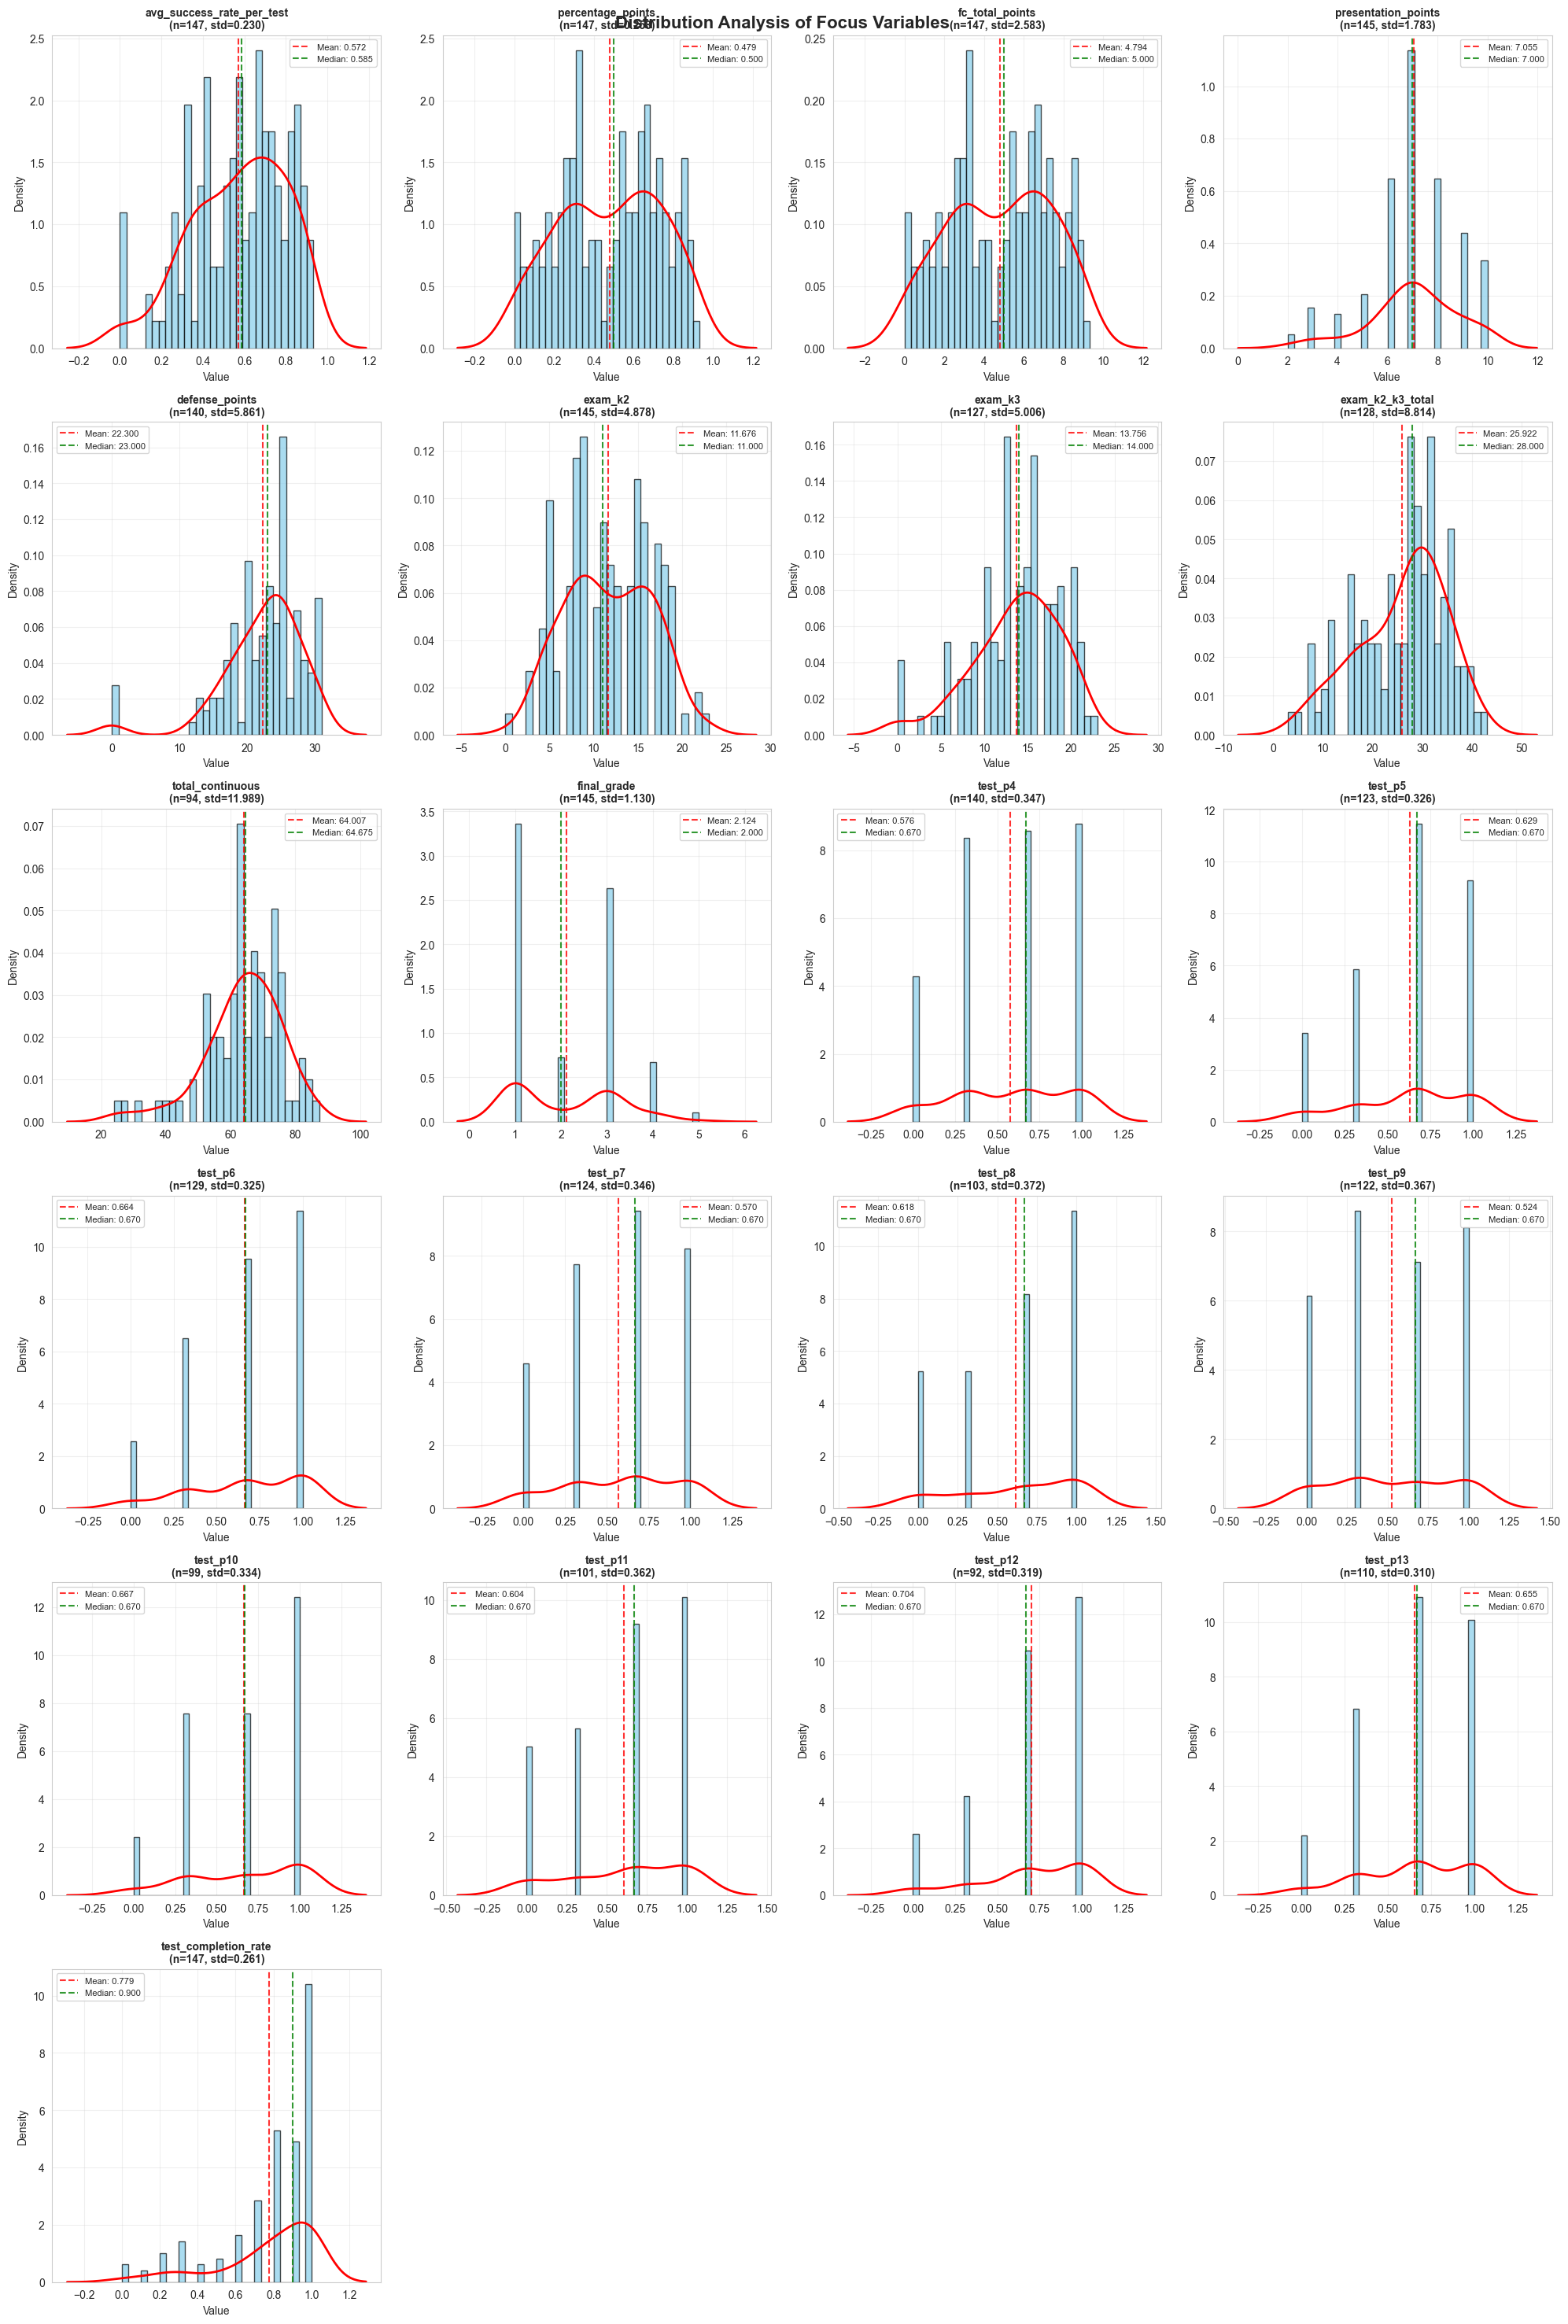


🔬 NORMALITY TESTING
Normality Test Results (α = 0.05):
                     Variable    N  Skewness  Kurtosis  Shapiro_p  \
0   avg_success_rate_per_test  147   -0.4928   -0.4096     0.0003   
1           percentage_points  147   -0.1201   -1.0793     0.0004   
2             fc_total_points  147   -0.1201   -1.0793     0.0004   
3         presentation_points  145   -0.5189    0.3097     0.0000   
4              defense_points  140   -1.5418    3.8775     0.0000   
5                     exam_k2  145    0.0253   -0.8537     0.0116   
6                     exam_k3  127   -0.6782    0.2195     0.0006   
7            exam_k2_k3_total  128   -0.5339   -0.4235     0.0015   
8            total_continuous   94   -0.9205    1.3651     0.0012   
9                 final_grade  145    0.3639   -1.1468     0.0000   
10                    test_p4  140   -0.2172   -1.1603     0.0000   
11                    test_p5  123   -0.5198   -0.7370     0.0000   
12                    test_p6  129   -0.5541   

In [5]:
# Create distribution plots for all numeric variables
print("📈 DISTRIBUTION ANALYSIS")
print("=" * 50)

# Calculate number of subplots needed
n_vars = len(numeric_vars)
n_cols = 4
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, var in enumerate(numeric_vars):
    ax = axes[i] if n_vars > 1 else axes
    
    # Create histogram with KDE
    data = df_analysis[var].dropna()
    
    if len(data) > 0:
        ax.hist(data, bins=30, alpha=0.7, color='skyblue', edgecolor='black', density=True)
        
        # Add KDE if data has variation
        if data.std() > 0:
            try:
                sns.kdeplot(data=data, ax=ax, color='red', linewidth=2)
            except:
                pass
        
        # Add statistics
        mean_val = data.mean()
        median_val = data.median()
        ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.3f}')
        ax.axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Median: {median_val:.3f}')
        
        ax.set_title(f'{var}\n(n={len(data)}, std={data.std():.3f})', fontsize=10, fontweight='bold')
        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)
    else:
        ax.text(0.5, 0.5, f'No data\navailable\nfor {var}', 
                transform=ax.transAxes, ha='center', va='center', fontsize=12)
        ax.set_title(f'{var} (No Data)', fontsize=10)

# Remove empty subplots
for i in range(n_vars, len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Distribution Analysis of Focus Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Normality testing
print("\n🔬 NORMALITY TESTING")
print("=" * 50)

normality_results = []

for var in numeric_vars:
    data = df_analysis[var].dropna()
    
    if len(data) > 8:  # Minimum sample size for normality tests
        # Shapiro-Wilk test (better for smaller samples)
        shapiro_stat, shapiro_p = shapiro(data)
        
        # D'Agostino's normality test (better for larger samples)
        try:
            dagostino_stat, dagostino_p = normaltest(data)
        except:
            dagostino_stat, dagostino_p = np.nan, np.nan
        
        # Calculate skewness and kurtosis
        skewness = stats.skew(data)
        kurt = stats.kurtosis(data)
        
        normality_results.append({
            'Variable': var,
            'N': len(data),
            'Skewness': skewness,
            'Kurtosis': kurt,
            'Shapiro_p': shapiro_p,
            'DAgostino_p': dagostino_p,
            'Normal_Shapiro': 'Yes' if shapiro_p > 0.05 else 'No',
            'Normal_DAgostino': 'Yes' if dagostino_p > 0.05 else 'No'
        })

normality_df = pd.DataFrame(normality_results)
if len(normality_df) > 0:
    print("Normality Test Results (α = 0.05):")
    print(normality_df.round(4))
else:
    print("Insufficient data for normality testing.")

## 5. Correlation Analysis

🔗 CORRELATION ANALYSIS


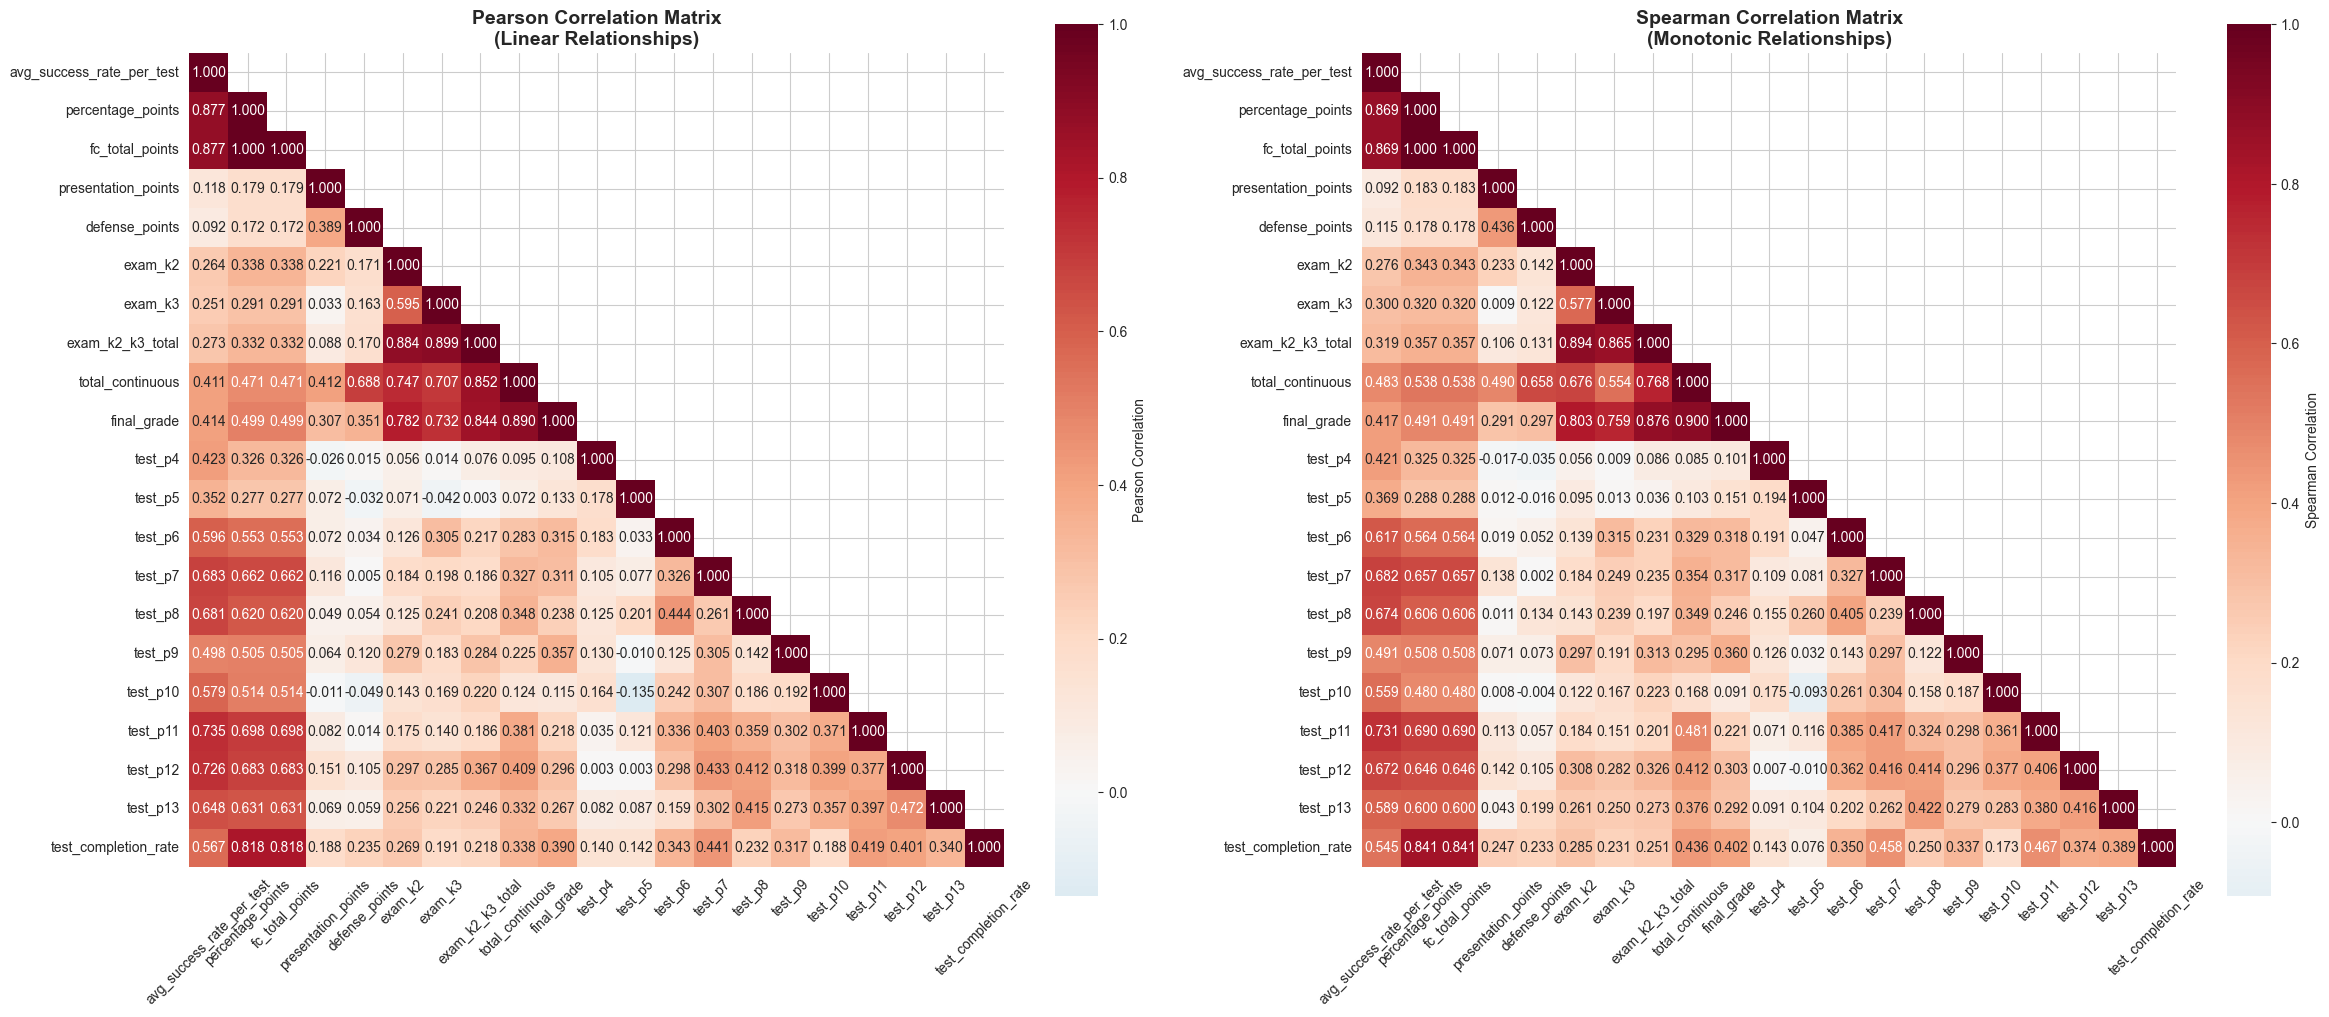


🔍 STRONGEST CORRELATIONS
Top 15 Pearson Correlations:
                    Variable_1            Variable_2  Correlation
20           percentage_points       fc_total_points        1.000
105                    exam_k3      exam_k2_k3_total        0.899
132           total_continuous           final_grade        0.890
91                     exam_k2      exam_k2_k3_total        0.884
0    avg_success_rate_per_test     percentage_points        0.877
1    avg_success_rate_per_test       fc_total_points        0.877
119           exam_k2_k3_total      total_continuous        0.852
120           exam_k2_k3_total           final_grade        0.844
38           percentage_points  test_completion_rate        0.818
56             fc_total_points  test_completion_rate        0.818
93                     exam_k2           final_grade        0.782
92                     exam_k2      total_continuous        0.747
16   avg_success_rate_per_test              test_p11        0.735
107                  

In [6]:
# Comprehensive correlation analysis
print("🔗 CORRELATION ANALYSIS")
print("=" * 50)

# Calculate correlation matrices
correlation_data = df_analysis[numeric_vars]

# Pearson correlation (linear relationships)
pearson_corr = correlation_data.corr(method='pearson')

# Spearman correlation (monotonic relationships)
spearman_corr = correlation_data.corr(method='spearman')

# Create correlation heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# Pearson correlation heatmap
mask1 = np.triu(pearson_corr, k=1)
sns.heatmap(pearson_corr, annot=True, cmap='RdBu_r', center=0, 
            square=True, mask=mask1, ax=ax1, fmt='.3f',
            cbar_kws={'label': 'Pearson Correlation'})
ax1.set_title('Pearson Correlation Matrix\n(Linear Relationships)', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', rotation=0)

# Spearman correlation heatmap
mask2 = np.triu(spearman_corr, k=1)
sns.heatmap(spearman_corr, annot=True, cmap='RdBu_r', center=0, 
            square=True, mask=mask2, ax=ax2, fmt='.3f',
            cbar_kws={'label': 'Spearman Correlation'})
ax2.set_title('Spearman Correlation Matrix\n(Monotonic Relationships)', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

# Find strongest correlations
print("\n🔍 STRONGEST CORRELATIONS")
print("=" * 50)

def get_top_correlations(corr_matrix, n=10):
    # Get upper triangle of correlation matrix
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find pairs with highest absolute correlation
    correlations = []
    for i in range(len(upper_tri.columns)):
        for j in range(len(upper_tri.columns)):
            if pd.notna(upper_tri.iloc[i, j]):
                correlations.append({
                    'Variable_1': upper_tri.columns[i],
                    'Variable_2': upper_tri.columns[j],
                    'Correlation': upper_tri.iloc[i, j],
                    'Abs_Correlation': abs(upper_tri.iloc[i, j])
                })
    
    corr_df = pd.DataFrame(correlations)
    return corr_df.sort_values('Abs_Correlation', ascending=False).head(n)

# Top Pearson correlations
top_pearson = get_top_correlations(pearson_corr, 15)
print("Top 15 Pearson Correlations:")
print(top_pearson[['Variable_1', 'Variable_2', 'Correlation']].round(3))

# Top Spearman correlations
top_spearman = get_top_correlations(spearman_corr, 15)
print("\nTop 15 Spearman Correlations:")
print(top_spearman[['Variable_1', 'Variable_2', 'Correlation']].round(3))

## 6. Test Performance Deep Dive

📝 TEST PERFORMANCE DEEP DIVE


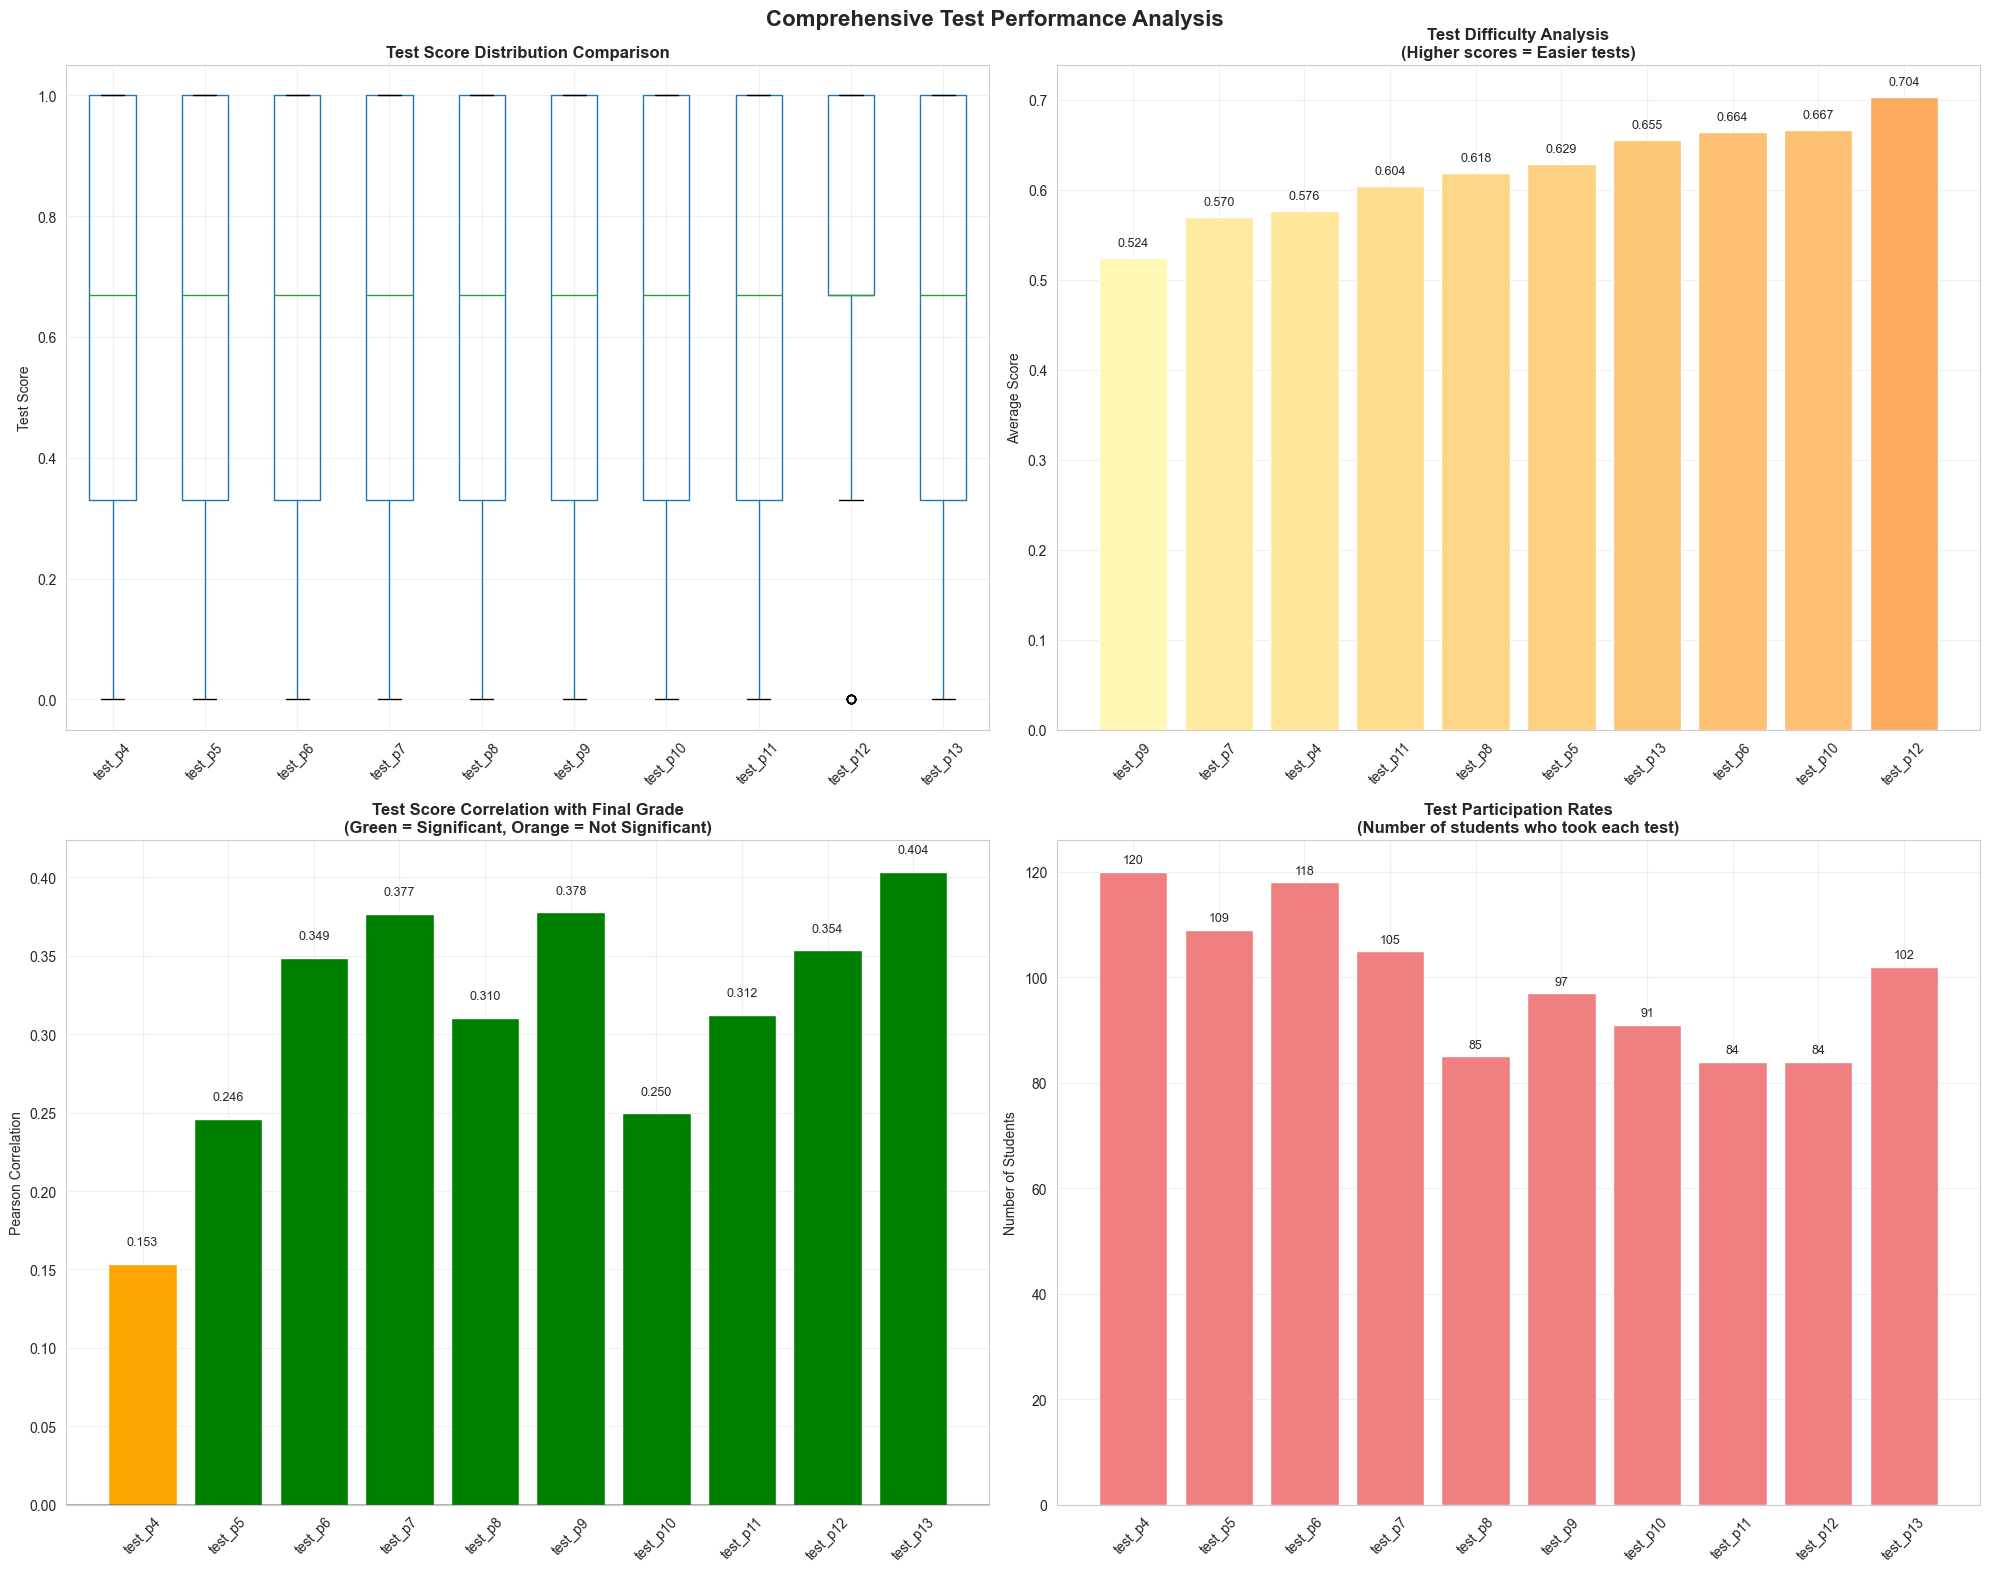


📊 TEST STATISTICS SUMMARY
Detailed Test Statistics:
          count    mean     std  min  max  participation_rate  zero_rate
test_p4   140.0  0.5762  0.3468  0.0  1.0              0.8163     0.1361
test_p5   123.0  0.6293  0.3264  0.0  1.0              0.7415     0.0952
test_p6   129.0  0.6644  0.3248  0.0  1.0              0.8027     0.0748
test_p7   124.0  0.5701  0.3456  0.0  1.0              0.7143     0.1293
test_p8   103.0  0.6184  0.3723  0.0  1.0              0.5782     0.1224
test_p9   122.0  0.5244  0.3668  0.0  1.0              0.6599     0.1701
test_p10   99.0  0.6667  0.3342  0.0  1.0              0.6190     0.0544
test_p11  101.0  0.6044  0.3619  0.0  1.0              0.5714     0.1156
test_p12   92.0  0.7036  0.3186  0.0  1.0              0.5714     0.0544
test_p13  110.0  0.6550  0.3102  0.0  1.0              0.6939     0.0544


In [7]:
# Detailed analysis of test performance variables
print("📝 TEST PERFORMANCE DEEP DIVE")
print("=" * 50)

# Get test columns
test_cols = [col for col in numeric_vars if col.startswith('test_p')]

if len(test_cols) > 0:
    # Test performance heatmap by student
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    
    # 1. Test score distribution comparison
    ax1 = axes[0, 0]
    test_data = df_analysis[test_cols]
    test_data.boxplot(ax=ax1, rot=45)
    ax1.set_title('Test Score Distribution Comparison', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Test Score')
    ax1.grid(True, alpha=0.3)
    
    # 2. Test difficulty analysis (based on mean scores)
    ax2 = axes[0, 1]
    test_means = test_data.mean().sort_values()
    bars = ax2.bar(range(len(test_means)), test_means.values, 
                   color=plt.cm.RdYlBu_r(test_means.values))
    ax2.set_xticks(range(len(test_means)))
    ax2.set_xticklabels(test_means.index, rotation=45)
    ax2.set_title('Test Difficulty Analysis\n(Higher scores = Easier tests)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Average Score')
    ax2.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, value in zip(bars, test_means.values):
        ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontsize=9)
    
    # 3. Test score correlation with final grade
    ax3 = axes[1, 0]
    test_final_corr = []
    for test in test_cols:
        corr, p_val = pearsonr(df_analysis[test].fillna(0), 
                              df_analysis['final_grade'].fillna(0))
        test_final_corr.append({'Test': test, 'Correlation': corr, 'P_value': p_val})
    
    corr_df = pd.DataFrame(test_final_corr)
    bars = ax3.bar(range(len(corr_df)), corr_df['Correlation'], 
                   color=['green' if p < 0.05 else 'orange' for p in corr_df['P_value']])
    ax3.set_xticks(range(len(corr_df)))
    ax3.set_xticklabels(corr_df['Test'], rotation=45)
    ax3.set_title('Test Score Correlation with Final Grade\n(Green = Significant, Orange = Not Significant)', 
                  fontsize=12, fontweight='bold')
    ax3.set_ylabel('Pearson Correlation')
    ax3.grid(True, alpha=0.3)
    ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Add value labels
    for bar, corr in zip(bars, corr_df['Correlation']):
        ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
                f'{corr:.3f}', ha='center', va='bottom', fontsize=9)
    
    # 4. Test completion pattern
    ax4 = axes[1, 1]
    completion_data = (test_data > 0).sum(axis=0)
    bars = ax4.bar(range(len(completion_data)), completion_data.values, color='lightcoral')
    ax4.set_xticks(range(len(completion_data)))
    ax4.set_xticklabels(completion_data.index, rotation=45)
    ax4.set_title('Test Participation Rates\n(Number of students who took each test)', 
                  fontsize=12, fontweight='bold')
    ax4.set_ylabel('Number of Students')
    ax4.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, count in zip(bars, completion_data.values):
        ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
                f'{count}', ha='center', va='bottom', fontsize=9)
    
    plt.suptitle('Comprehensive Test Performance Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Statistical summary of tests
    print("\n📊 TEST STATISTICS SUMMARY")
    print("=" * 50)
    
    test_stats = test_data.describe().T
    test_stats['participation_rate'] = (test_data > 0).mean()
    test_stats['zero_rate'] = (test_data == 0).mean()
    test_stats = test_stats.round(4)
    
    print("Detailed Test Statistics:")
    print(test_stats[['count', 'mean', 'std', 'min', 'max', 'participation_rate', 'zero_rate']])
    
else:
    print("No individual test score columns found for analysis.")

## 7. Academic Performance Components Analysis

🎓 ACADEMIC PERFORMANCE COMPONENTS ANALYSIS
Available component groups: ['Assessment', 'Exams', 'Continuous', 'Overall', 'Engagement']


TypeError: expected 1D vector for x

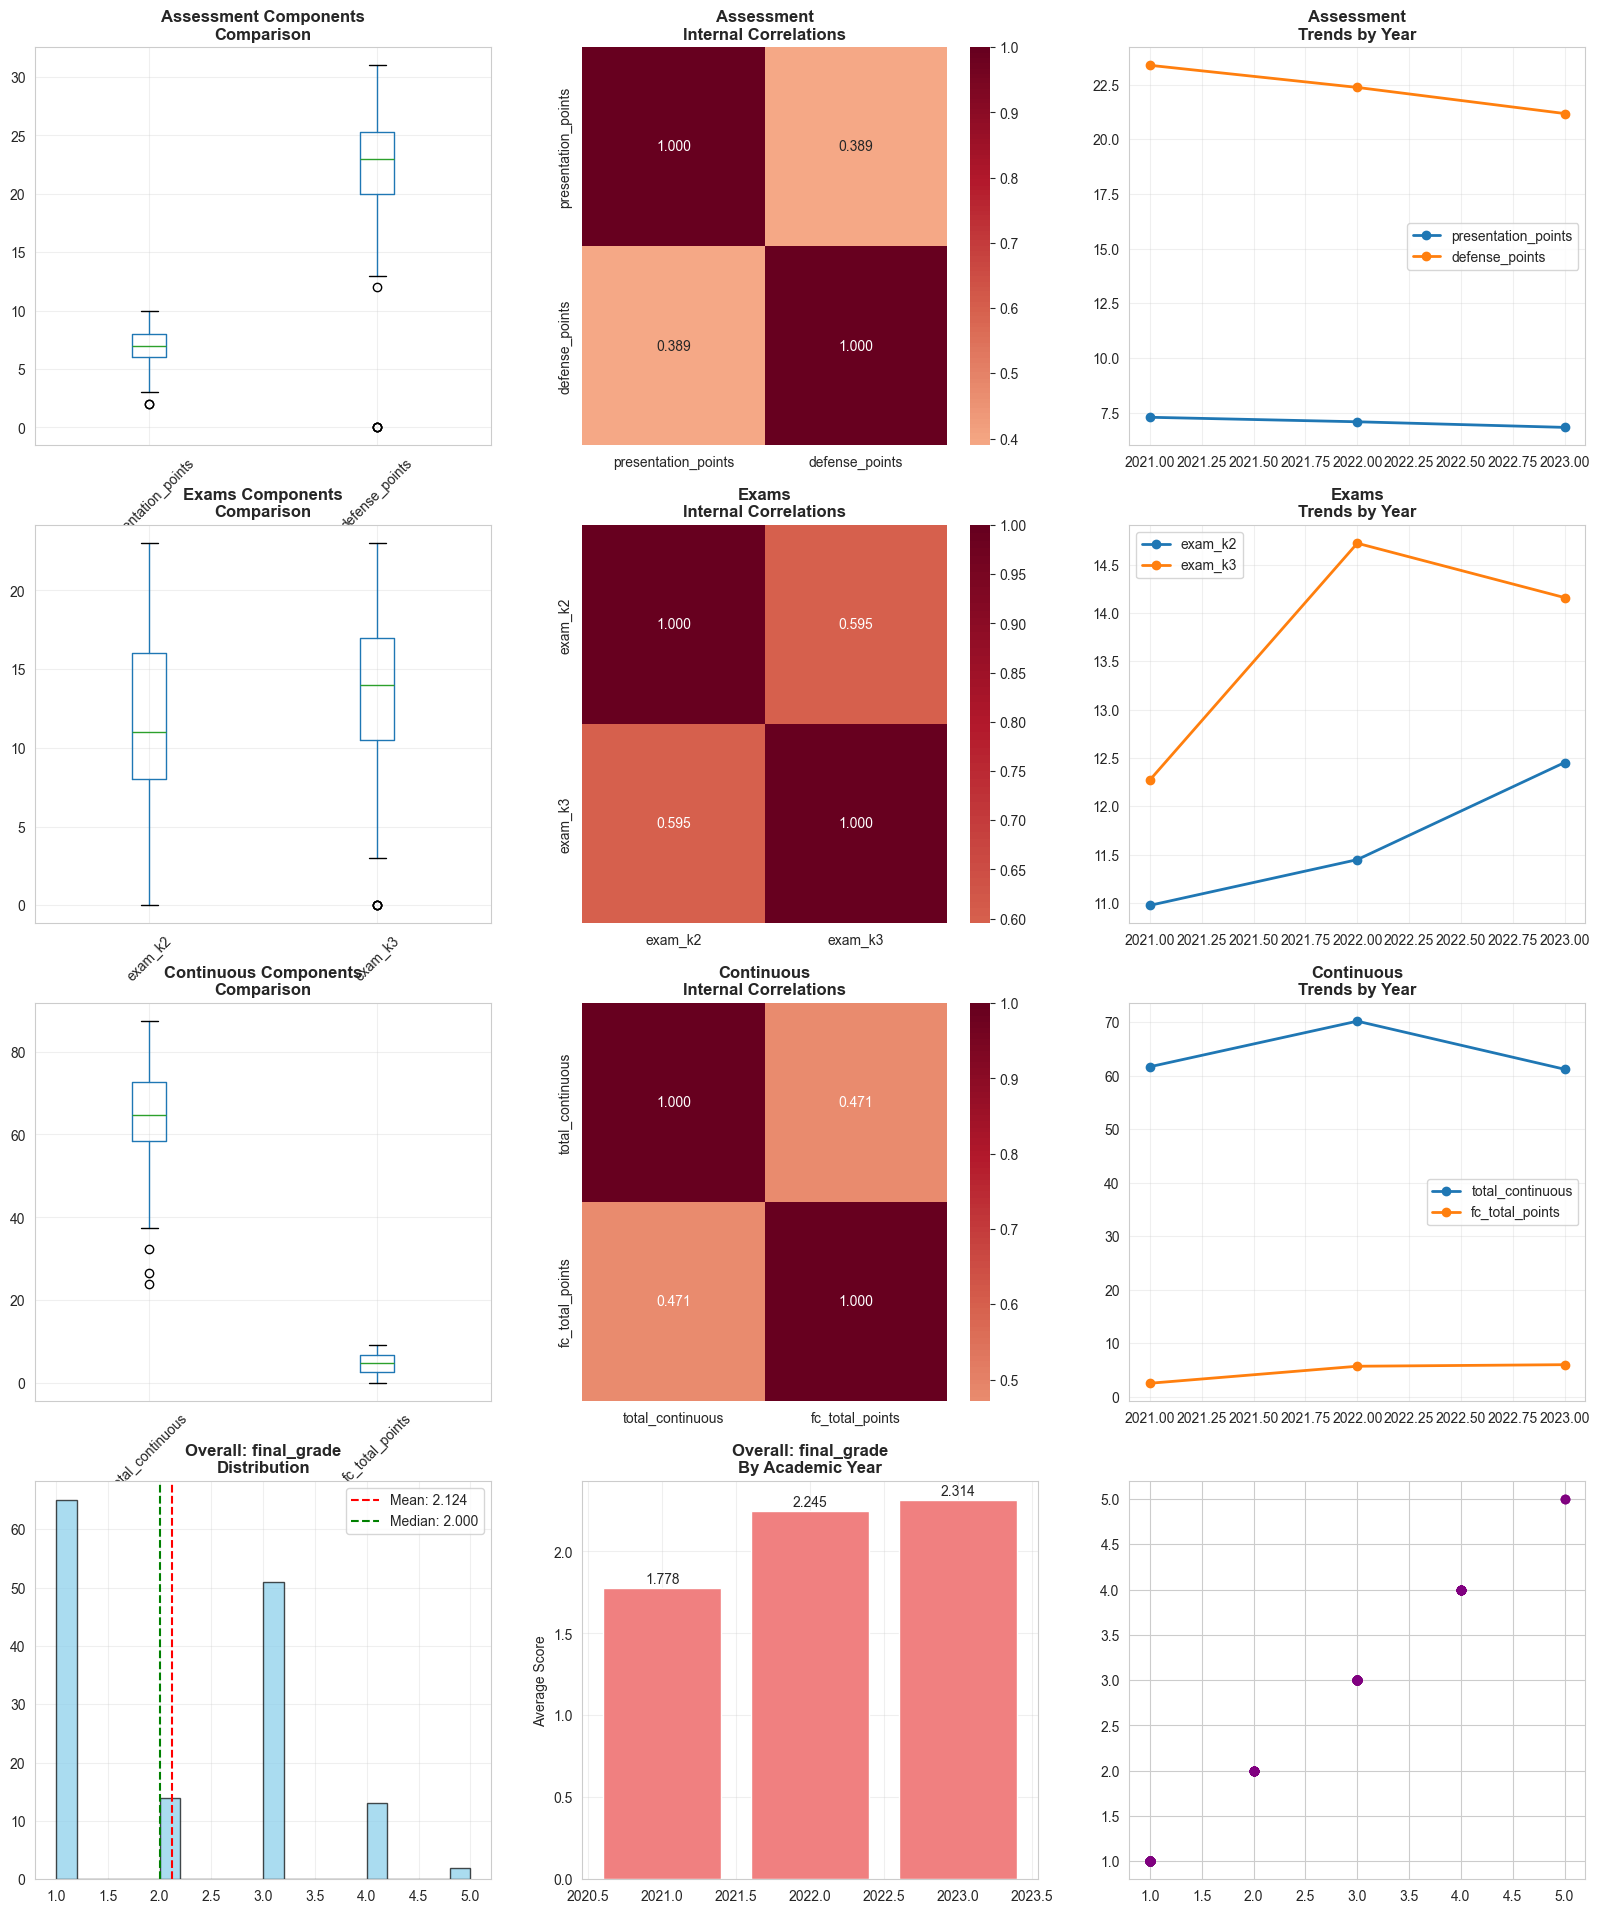

In [8]:
# Analysis of different academic performance components
print("🎓 ACADEMIC PERFORMANCE COMPONENTS ANALYSIS")
print("=" * 50)

# Define component groups
component_groups = {
    'Assessment': ['presentation_points', 'defense_points'],
    'Exams': ['exam_k2', 'exam_k3', 'exam_k1_k2_total'],
    'Continuous': ['total_continuous', 'fc_total_points'],
    'Overall': ['final_grade'],
    'Engagement': ['test_completion_rate']
}

# Filter available variables by group
available_components = {}
for group, vars_list in component_groups.items():
    available_vars_in_group = [var for var in vars_list if var in numeric_vars]
    if available_vars_in_group:
        available_components[group] = available_vars_in_group

print(f"Available component groups: {list(available_components.keys())}")

# Create comprehensive analysis
n_groups = len(available_components)
if n_groups > 0:
    fig = plt.figure(figsize=(20, 6 * n_groups))
    
    plot_idx = 1
    
    for group_name, group_vars in available_components.items():
        if len(group_vars) == 1:
            # Single variable - show distribution and by year
            var = group_vars[0]
            
            # Distribution plot
            ax1 = plt.subplot(n_groups, 3, plot_idx)
            data = df_analysis[var].dropna()
            ax1.hist(data, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
            ax1.axvline(data.mean(), color='red', linestyle='--', label=f'Mean: {data.mean():.3f}')
            ax1.axvline(data.median(), color='green', linestyle='--', label=f'Median: {data.median():.3f}')
            ax1.set_title(f'{group_name}: {var}\nDistribution', fontweight='bold')
            ax1.legend()
            ax1.grid(True, alpha=0.3)
            
            # By year analysis
            ax2 = plt.subplot(n_groups, 3, plot_idx + 1)
            year_data = df_analysis.groupby('academic_year')[var].mean()
            bars = ax2.bar(year_data.index, year_data.values, color='lightcoral')
            ax2.set_title(f'{group_name}: {var}\nBy Academic Year', fontweight='bold')
            ax2.set_ylabel('Average Score')
            ax2.grid(True, alpha=0.3)
            
            for bar, val in zip(bars, year_data.values):
                ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
                        f'{val:.3f}', ha='center', va='bottom')
            
            # Correlation with final grade
            ax3 = plt.subplot(n_groups, 3, plot_idx + 2)
            valid_data = df_analysis[[var, 'final_grade']].dropna()
            if len(valid_data) > 5:
                ax3.scatter(valid_data[var], valid_data['final_grade'], alpha=0.6, color='purple')
                
                # Add trend line
                z = np.polyfit(valid_data[var], valid_data['final_grade'], 1)
                p = np.poly1d(z)
                ax3.plot(valid_data[var], p(valid_data[var]), "r--", alpha=0.8)
                
                corr, p_val = pearsonr(valid_data[var], valid_data['final_grade'])
                ax3.set_title(f'{group_name}: {var}\nvs Final Grade\nr={corr:.3f}, p={p_val:.3f}', fontweight='bold')
                ax3.set_xlabel(var)
                ax3.set_ylabel('Final Grade')
                ax3.grid(True, alpha=0.3)
            
        elif len(group_vars) > 1:
            # Multiple variables - show comparison
            ax1 = plt.subplot(n_groups, 3, plot_idx)
            group_data = df_analysis[group_vars]
            group_data.boxplot(ax=ax1, rot=45)
            ax1.set_title(f'{group_name} Components\nComparison', fontweight='bold')
            ax1.grid(True, alpha=0.3)
            
            # Correlation within group
            ax2 = plt.subplot(n_groups, 3, plot_idx + 1)
            if len(group_vars) > 1:
                corr_matrix = group_data.corr()
                sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, ax=ax2, fmt='.3f')
                ax2.set_title(f'{group_name}\nInternal Correlations', fontweight='bold')
            
            # Average by year
            ax3 = plt.subplot(n_groups, 3, plot_idx + 2)
            year_means = df_analysis.groupby('academic_year')[group_vars].mean()
            for var in group_vars:
                ax3.plot(year_means.index, year_means[var], marker='o', label=var, linewidth=2)
            ax3.set_title(f'{group_name}\nTrends by Year', fontweight='bold')
            ax3.legend()
            ax3.grid(True, alpha=0.3)
        
        plot_idx += 3
    
    plt.suptitle('Academic Performance Components Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Component contribution analysis
print("\n📈 COMPONENT CONTRIBUTION ANALYSIS")
print("=" * 50)

# Calculate correlations with final grade
final_grade_correlations = []
for var in numeric_vars:
    if var != 'final_grade':
        valid_data = df_analysis[[var, 'final_grade']].dropna()
        if len(valid_data) > 5:
            corr, p_val = pearsonr(valid_data[var], valid_data['final_grade'])
            final_grade_correlations.append({
                'Variable': var,
                'Correlation': corr,
                'P_value': p_val,
                'Significant': 'Yes' if p_val < 0.05 else 'No',
                'N_observations': len(valid_data)
            })

if final_grade_correlations:
    corr_results = pd.DataFrame(final_grade_correlations)
    corr_results = corr_results.sort_values('Correlation', key=abs, ascending=False)
    
    print("Correlations with Final Grade (sorted by absolute correlation):")
    print(corr_results.round(4))
    
    # Visualize top correlations
    plt.figure(figsize=(14, 8))
    top_corrs = corr_results.head(15)
    colors = ['darkgreen' if sig == 'Yes' else 'lightcoral' for sig in top_corrs['Significant']]
    
    bars = plt.barh(range(len(top_corrs)), top_corrs['Correlation'], color=colors)
    plt.yticks(range(len(top_corrs)), top_corrs['Variable'])
    plt.xlabel('Correlation with Final Grade')
    plt.title('Top 15 Correlations with Final Grade\n(Dark Green = Significant, Light Red = Not Significant)', 
              fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.grid(True, alpha=0.3, axis='x')
    
    # Add correlation values on bars
    for bar, corr in zip(bars, top_corrs['Correlation']):
        plt.text(bar.get_width() + (0.01 if corr > 0 else -0.01), bar.get_y() + bar.get_height()/2,
                f'{corr:.3f}', ha='left' if corr > 0 else 'right', va='center')
    
    plt.tight_layout()
    plt.show()

## 8. Year-wise Performance Analysis

In [ ]:
# Comprehensive year-wise analysis
print("📅 YEAR-WISE PERFORMANCE ANALYSIS")
print("=" * 50)

# Statistical comparison between years
years = sorted(df_analysis['academic_year'].unique())
print(f"Academic years in dataset: {years}")

if len(years) > 1:
    # ANOVA testing for differences between years
    print("\n🔬 STATISTICAL TESTING (ANOVA)")
    print("=" * 30)
    
    anova_results = []
    for var in numeric_vars:
        if var != 'academic_year':
            year_groups = [df_analysis[df_analysis['academic_year'] == year][var].dropna() 
                          for year in years]
            
            # Only perform ANOVA if we have data for all years
            if all(len(group) > 0 for group in year_groups):
                try:
                    f_stat, p_val = stats.f_oneway(*year_groups)
                    anova_results.append({
                        'Variable': var,
                        'F_statistic': f_stat,
                        'P_value': p_val,
                        'Significant': 'Yes' if p_val < 0.05 else 'No'
                    })
                except:
                    pass
    
    if anova_results:
        anova_df = pd.DataFrame(anova_results)
        anova_df = anova_df.sort_values('P_value')
        print("ANOVA Results (testing for differences between years):")
        print(anova_df.round(4))
    
    # Visualization of year-wise trends
    significant_vars = []
    if anova_results:
        significant_vars = [result['Variable'] for result in anova_results if result['P_value'] < 0.05]
    
    # Select variables to visualize (significant ones + key variables)
    key_vars_to_plot = ['final_grade', 'test_completion_rate'] + significant_vars[:8]
    key_vars_to_plot = list(set(key_vars_to_plot))  # Remove duplicates
    key_vars_to_plot = [var for var in key_vars_to_plot if var in numeric_vars]
    
    if len(key_vars_to_plot) > 0:
        n_vars = len(key_vars_to_plot)
        n_cols = 3
        n_rows = (n_vars + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
        axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
        
        for i, var in enumerate(key_vars_to_plot):
            ax = axes[i]
            
            # Box plot by year
            year_data = [df_analysis[df_analysis['academic_year'] == year][var].dropna() 
                        for year in years]
            
            bp = ax.boxplot(year_data, labels=years, patch_artist=True)
            
            # Color boxes based on significance
            is_significant = var in significant_vars
            for patch in bp['boxes']:
                patch.set_facecolor('lightcoral' if is_significant else 'lightblue')
                patch.set_alpha(0.7)
            
            # Add mean points
            year_means = [data.mean() for data in year_data]
            ax.plot(range(1, len(years) + 1), year_means, 'ro-', linewidth=2, markersize=8, label='Mean')
            
            ax.set_title(f'{var}\n{"(Significantly different)" if is_significant else "(Not significant)"}', 
                        fontweight='bold')
            ax.set_xlabel('Academic Year')
            ax.set_ylabel(var)
            ax.legend()
            ax.grid(True, alpha=0.3)
        
        # Remove empty subplots
        for i in range(len(key_vars_to_plot), len(axes)):
            fig.delaxes(axes[i])
        
        plt.suptitle('Year-wise Performance Analysis\n(Red = Significantly Different, Blue = Not Significant)', 
                     fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

# Year-wise summary statistics
print("\n📊 YEAR-WISE SUMMARY STATISTICS")
print("=" * 50)

# Key variables summary
summary_vars = ['final_grade', 'test_completion_rate'] + [var for var in ['exam_k2', 'exam_k3', 'total_continuous'] if var in numeric_vars]
summary_vars = list(set(summary_vars))

yearly_summary = df_analysis.groupby('academic_year')[summary_vars].agg(['count', 'mean', 'std', 'median']).round(3)

for var in summary_vars:
    print(f"\n{var.upper()}:")
    print(yearly_summary[var])

# Effect sizes (Cohen's d) for significant differences
if len(years) == 2 and anova_results:
    print("\n📏 EFFECT SIZES (Cohen's d)")
    print("=" * 30)
    
    def cohens_d(group1, group2):
        """Calculate Cohen's d effect size"""
        n1, n2 = len(group1), len(group2)
        pooled_std = np.sqrt(((n1 - 1) * group1.var() + (n2 - 1) * group2.var()) / (n1 + n2 - 2))
        return (group1.mean() - group2.mean()) / pooled_std
    
    effect_sizes = []
    for var in significant_vars:
        group1 = df_analysis[df_analysis['academic_year'] == years[0]][var].dropna()
        group2 = df_analysis[df_analysis['academic_year'] == years[1]][var].dropna()
        
        if len(group1) > 0 and len(group2) > 0:
            d = cohens_d(group1, group2)
            magnitude = 'Small' if abs(d) < 0.5 else 'Medium' if abs(d) < 0.8 else 'Large'
            effect_sizes.append({
                'Variable': var,
                'Cohens_d': d,
                'Magnitude': magnitude,
                'Direction': 'Improved' if d > 0 else 'Declined'
            })
    
    if effect_sizes:
        effect_df = pd.DataFrame(effect_sizes)
        print("Effect sizes for significant differences:")
        print(effect_df.round(3))

## 9. Summary and Key Findings

In [ ]:
# Generate comprehensive summary of findings
print("📋 EDA SUMMARY AND KEY FINDINGS")
print("=" * 60)

# Data overview summary
print(f"\n📊 DATASET OVERVIEW:")
print(f"• Total students analyzed: {len(df_analysis)}")
print(f"• Academic years: {', '.join(map(str, years))}")
print(f"• Variables analyzed: {len(numeric_vars)}")
print(f"• Complete cases: {len(df_analysis.dropna())}")

# Key statistics
print(f"\n📈 KEY PERFORMANCE METRICS:")
if 'final_grade' in df_analysis.columns:
    mean_grade = df_analysis['final_grade'].mean()
    pass_rate = (df_analysis['final_grade'] >= 2).mean() * 100
    print(f"• Average final grade: {mean_grade:.3f}")
    print(f"• Overall pass rate: {pass_rate:.1f}%")

if 'test_completion_rate' in df_analysis.columns:
    avg_completion = df_analysis['test_completion_rate'].mean() * 100
    print(f"• Average test completion rate: {avg_completion:.1f}%")

# Top correlations summary
if 'final_grade_correlations' in locals() and final_grade_correlations:
    print(f"\n🔗 TOP PREDICTORS OF FINAL GRADE:")
    top_3_predictors = corr_results.head(3)
    for _, row in top_3_predictors.iterrows():
        print(f"• {row['Variable']}: r = {row['Correlation']:.3f} {'*' if row['Significant'] == 'Yes' else ''}")

# Distribution insights
if 'normality_df' in locals() and len(normality_df) > 0:
    normal_vars = normality_df[normality_df['Normal_Shapiro'] == 'Yes']['Variable'].tolist()
    non_normal_vars = normality_df[normality_df['Normal_Shapiro'] == 'No']['Variable'].tolist()
    
    print(f"\n📊 DISTRIBUTION CHARACTERISTICS:")
    print(f"• Variables with normal distribution: {len(normal_vars)}")
    print(f"• Variables with non-normal distribution: {len(non_normal_vars)}")
    
    if len(non_normal_vars) > 0:
        print(f"• Non-normal variables: {', '.join(non_normal_vars[:5])}{'...' if len(non_normal_vars) > 5 else ''}")

# Year-wise insights
if len(years) > 1:
    print(f"\n📅 YEAR-WISE INSIGHTS:")
    if 'anova_results' in locals() and anova_results:
        significant_changes = len([r for r in anova_results if r['P_value'] < 0.05])
        print(f"• Variables showing significant year-to-year changes: {significant_changes}")
        
        if significant_changes > 0:
            most_significant = min(anova_results, key=lambda x: x['P_value'])
            print(f"• Most significant change: {most_significant['Variable']} (p = {most_significant['P_value']:.4f})")

# Test performance insights
if len(test_cols) > 0:
    test_means = df_analysis[test_cols].mean()
    easiest_test = test_means.idxmax()
    hardest_test = test_means.idxmin()
    
    print(f"\n📝 TEST PERFORMANCE INSIGHTS:")
    print(f"• Number of individual tests analyzed: {len(test_cols)}")
    print(f"• Easiest test (highest avg score): {easiest_test} ({test_means[easiest_test]:.3f})")
    print(f"• Most challenging test (lowest avg score): {hardest_test} ({test_means[hardest_test]:.3f})")
    
    if 'test_final_corr' in locals():
        best_predictor = max(test_final_corr, key=lambda x: abs(x['Correlation']))
        print(f"• Best individual test predictor of final grade: {best_predictor['Test']} (r = {best_predictor['Correlation']:.3f})")
